# **Imports**

In [1]:
import os
os.chdir("../..")
os.chdir(r"src")

from GloVe.weights import *
import warnings
warnings.filterwarnings("ignore")
from Axes.projection_functions import *
from Polarization.polarization_functions import *
from Polarization.polarization_plots import *
from Axes.curves_plots import *

os.chdir("../")

# **Parameters**

In [9]:
axis = 1
sources = ['par']
focus_on_companies = None
curves_by_company = None

# **Plots**

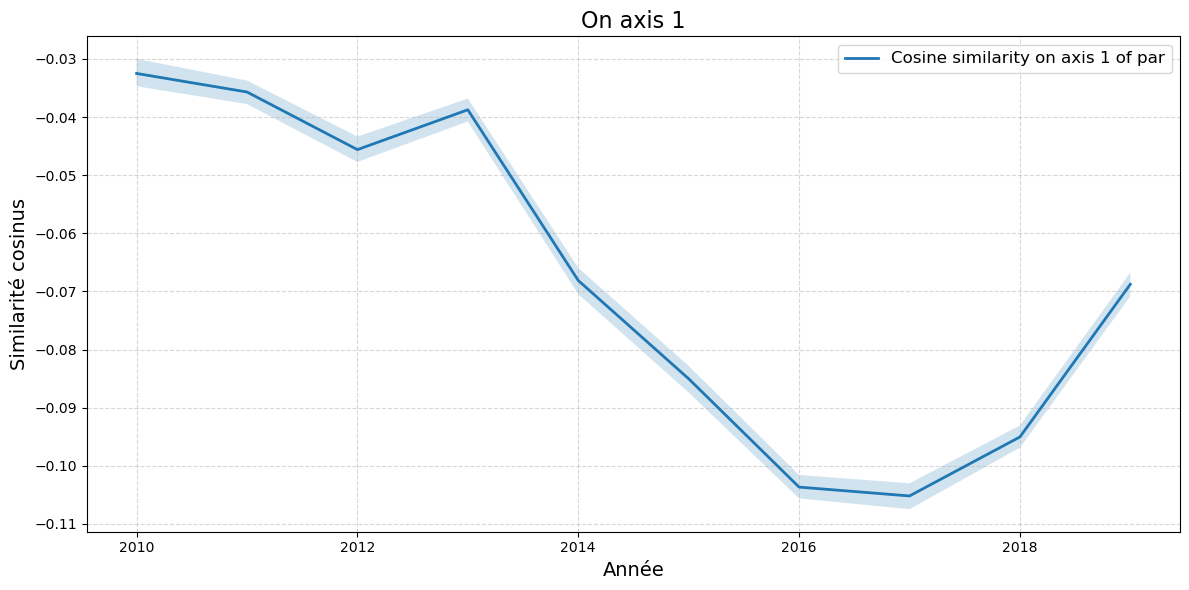

In [10]:
choose_projection_cos(axis, sources, focus_on_companies, curves_by_company)